# Looking at Census Data On Tenure for American Indian Alaska Native Households in Los Angeles County

Our group is ultimately interested in looking at land tenure, who owns which open parcels of lands, and how are those parcels of lands used and have open space accessible/and usable to whom? And also who stewards this land. While the USDA agricultural Census tracks land ownership related to agricultural and other uses, that data is not available through the US Census, which surveys individuals in the population, as opposed to surveying agricultural and other open lands. The US Census also does not ask individuals about their relationship to land ownership or how much open land is on their property.

Instead, the Census, through the American Community Survey (ACS), asks about Ownership, Home Value, and Rent, with the purpose of using this data to "enforce laws, regulations, and policies designed to eliminate discrimination in private-market housing, government programs, and in society." For this assignment, Melissa is going to look at the variable of tenure by owner occupied to compare against what Lupe will pull for single family housing. This is to assume that if a person owns their home, they also own the property of the land parcel the home sits on. In pulling these two variable together to make comparisons, we are presuming that we will get some insight into a form of land ownership through single family home ownership in Los Angeles County. However, residential property tells a different story from open parcel of lands, and not all residential properties come with open space or land on the property itself. And lastly, housing is treated as a commodity in the US, at least in urban areas. While someone may own their home, the survey does not distinguish between ownership in terms of mortages and other loans. While temporal data might provide insight, it is only through tracking individual's ownership trajectories that we would understand foreclosure histories and other fraught issues with ownership...

First I am going to import some libraries to help me with my dataframe and subsequent graphs and maps

In [1]:
import pandas as pd
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt

/opt/conda/lib/python3.9/site-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


Now I am going to import the [tenure data I downloaded from CensusExplorer.org](https://censusreporter.org/tables/B25003/). It is a GEOJSON file I uploaded into my Jupyter notebook. This data is from the Census ACS, and is broken down by census tract for LA County. I start with the data for the total summary (later will add racial demographic data)

In [6]:
own = gpd.read_file('acs2019_5yr_B25003_14000US06037222001.geojson')

## Data exploration time
Let's look at the data

In [8]:
#how many rows and columns
own.shape

(2346, 9)

In [9]:
#first 5 rows
own.head()

,geoid,name,B25003001,"B25003001, Error",B25003002,"B25003002, Error",B25003003,"B25003003, Error",geometry
0,14000US06037101110,"Census Tract 1011.10, Los Angeles, CA",1575.0,90.0,843.0,117.0,732.0,127.0,"MULTIPOLYGON (((-118.30229 34.25870, -118.3009..."
1,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",1312.0,63.0,1072.0,108.0,240.0,96.0,"MULTIPOLYGON (((-118.30334 34.27371, -118.3033..."
2,14000US06037101210,"Census Tract 1012.10, Los Angeles, CA",2297.0,98.0,401.0,146.0,1896.0,168.0,"MULTIPOLYGON (((-118.29945 34.25598, -118.2979..."
3,14000US06037101220,"Census Tract 1012.20, Los Angeles, CA",1357.0,57.0,535.0,98.0,822.0,88.0,"MULTIPOLYGON (((-118.28593 34.25227, -118.2859..."
4,14000US06037101300,"Census Tract 1013, Los Angeles, CA",1445.0,93.0,1255.0,105.0,190.0,78.0,"MULTIPOLYGON (((-118.27822 34.25068, -118.2782..."


<AxesSubplot:>

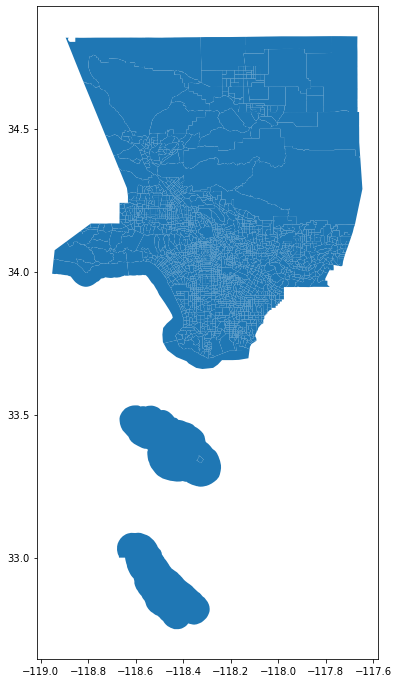

In [10]:
# plot 
own.plot(figsize=(12,12))

well that's great that this imported all census tracts in LA county, as that was the parameter I set when pulling from census explorer, yay

Now I'd like to see what data types are present

In [11]:
own.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2346 entries, 0 to 2345
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   geoid             2346 non-null   object  
 1   name              2346 non-null   object  
 2   B25003001         2346 non-null   float64 
 3   B25003001, Error  2346 non-null   float64 
 4   B25003002         2346 non-null   float64 
 5   B25003002, Error  2346 non-null   float64 
 6   B25003003         2346 non-null   float64 
 7   B25003003, Error  2346 non-null   float64 
 8   geometry          2346 non-null   geometry
dtypes: float64(6), geometry(1), object(2)
memory usage: 165.1+ KB


this is census data so it must have geoids for each census tract

In [13]:
own.geoid.head()

0    14000US06037101110
1    14000US06037101122
2    14000US06037101210
3    14000US06037101220
4    14000US06037101300
Name: geoid, dtype: object

ok it recognized the column for fips codes. I also now am looking at my metadata file that came with this download and see how the codes corresponded with headers.

My column headers include a margin of error column. I am going to delete these eventually, but first I want to convert the margin of error in sampling column numbers to percentages, so I'm going to have to change my column headers to make this less confusing

In [15]:
#let's change the column headers to something we understand

list(own) # this is the same as df.columns.to_list()

['geoid',
 'name',
 'B25003001',
 'B25003001, Error',
 'B25003002',
 'B25003002, Error',
 'B25003003',
 'B25003003, Error',
 'geometry']

In [18]:
#my metadata tells me which code is what
own.columns = ['geoid',
 'name',
 'total',
 'total, Error',
 'owner',
 'owner, Error',
 'renter',
 'renter, Error',
 'geometry']

In [19]:
#what do the column headers look like now?
own.head()

,geoid,name,total,"total, Error",owner,"owner, Error",renter,"renter, Error",geometry
0,14000US06037101110,"Census Tract 1011.10, Los Angeles, CA",1575.0,90.0,843.0,117.0,732.0,127.0,"MULTIPOLYGON (((-118.30229 34.25870, -118.3009..."
1,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",1312.0,63.0,1072.0,108.0,240.0,96.0,"MULTIPOLYGON (((-118.30334 34.27371, -118.3033..."
2,14000US06037101210,"Census Tract 1012.10, Los Angeles, CA",2297.0,98.0,401.0,146.0,1896.0,168.0,"MULTIPOLYGON (((-118.29945 34.25598, -118.2979..."
3,14000US06037101220,"Census Tract 1012.20, Los Angeles, CA",1357.0,57.0,535.0,98.0,822.0,88.0,"MULTIPOLYGON (((-118.28593 34.25227, -118.2859..."
4,14000US06037101300,"Census Tract 1013, Los Angeles, CA",1445.0,93.0,1255.0,105.0,190.0,78.0,"MULTIPOLYGON (((-118.27822 34.25068, -118.2782..."


the margin of error columns doesn't mean much if it isn't a percentage. Let me convert them

In [20]:
list(own)

['geoid',
 'name',
 'total',
 'total, Error',
 'owner',
 'owner, Error',
 'renter',
 'renter, Error',
 'geometry']

In [23]:
# I'm going to create a new column next to total that tells me the total margin of error as a percentage
own['Percent error for total'] = own['total, Error']/own['total']*100

In [24]:
display(own)

,geoid,name,total,"total, Error",owner,"owner, Error",renter,"renter, Error",geometry,Percent error for total
0,14000US06037101110,"Census Tract 1011.10, Los Angeles, CA",1575.0,90.0,843.0,117.0,732.0,127.0,"MULTIPOLYGON (((-118.30229 34.25870, -118.3009...",5.714286
1,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",1312.0,63.0,1072.0,108.0,240.0,96.0,"MULTIPOLYGON (((-118.30334 34.27371, -118.3033...",4.801829
2,14000US06037101210,"Census Tract 1012.10, Los Angeles, CA",2297.0,98.0,401.0,146.0,1896.0,168.0,"MULTIPOLYGON (((-118.29945 34.25598, -118.2979...",4.266434
3,14000US06037101220,"Census Tract 1012.20, Los Angeles, CA",1357.0,57.0,535.0,98.0,822.0,88.0,"MULTIPOLYGON (((-118.28593 34.25227, -118.2859...",4.200442
4,14000US06037101300,"Census Tract 1013, Los Angeles, CA",1445.0,93.0,1255.0,105.0,190.0,78.0,"MULTIPOLYGON (((-118.27822 34.25068, -118.2782...",6.435986
...,...,...,...,...,...,...,...,...,...,...
2341,14000US06037980031,"Census Tract 9800.31, Los Angeles, CA",24.0,27.0,0.0,12.0,24.0,27.0,"MULTIPOLYGON (((-118.29105 33.75378, -118.2905...",112.500000
2342,14000US06037980033,"Census Tract 9800.33, Los Angeles, CA",16.0,23.0,0.0,12.0,16.0,23.0,"MULTIPOLYGON (((-118.24897 33.75590, -118.2470...",143.750000
2343,14000US06037990100,"Census Tract 9901, Los Angeles, CA",0.0,12.0,0.0,12.0,0.0,12.0,"MULTIPOLYGON (((-118.95114 33.99643, -118.9505...",inf
2344,14000US06037990200,"Census Tract 9902, Los Angeles, CA",0.0,12.0,0.0,12.0,0.0,12.0,"MULTIPOLYGON (((-118.63598 34.03255, -118.6325...",inf


In [25]:
#not sure if there are any margin of errors that I should then use to exclude data for mapping purposes. usually, we want no more than 10% margin of error

#I'm going to skip this part and convert percentages for the owners and renters columns
own['Percent owner'] = own['owner']/own['total']*100
own['Percent renter'] = own['renter']/own['total']*100

In [26]:
display(own)

,geoid,name,total,"total, Error",owner,"owner, Error",renter,"renter, Error",geometry,Percent error for total,Percent owner,Percent renter
0,14000US06037101110,"Census Tract 1011.10, Los Angeles, CA",1575.0,90.0,843.0,117.0,732.0,127.0,"MULTIPOLYGON (((-118.30229 34.25870, -118.3009...",5.714286,53.523810,46.476190
1,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",1312.0,63.0,1072.0,108.0,240.0,96.0,"MULTIPOLYGON (((-118.30334 34.27371, -118.3033...",4.801829,81.707317,18.292683
2,14000US06037101210,"Census Tract 1012.10, Los Angeles, CA",2297.0,98.0,401.0,146.0,1896.0,168.0,"MULTIPOLYGON (((-118.29945 34.25598, -118.2979...",4.266434,17.457553,82.542447
3,14000US06037101220,"Census Tract 1012.20, Los Angeles, CA",1357.0,57.0,535.0,98.0,822.0,88.0,"MULTIPOLYGON (((-118.28593 34.25227, -118.2859...",4.200442,39.425203,60.574797
4,14000US06037101300,"Census Tract 1013, Los Angeles, CA",1445.0,93.0,1255.0,105.0,190.0,78.0,"MULTIPOLYGON (((-118.27822 34.25068, -118.2782...",6.435986,86.851211,13.148789
...,...,...,...,...,...,...,...,...,...,...,...,...
2341,14000US06037980031,"Census Tract 9800.31, Los Angeles, CA",24.0,27.0,0.0,12.0,24.0,27.0,"MULTIPOLYGON (((-118.29105 33.75378, -118.2905...",112.500000,0.000000,100.000000
2342,14000US06037980033,"Census Tract 9800.33, Los Angeles, CA",16.0,23.0,0.0,12.0,16.0,23.0,"MULTIPOLYGON (((-118.24897 33.75590, -118.2470...",143.750000,0.000000,100.000000
2343,14000US06037990100,"Census Tract 9901, Los Angeles, CA",0.0,12.0,0.0,12.0,0.0,12.0,"MULTIPOLYGON (((-118.95114 33.99643, -118.9505...",inf,NaN,NaN
2344,14000US06037990200,"Census Tract 9902, Los Angeles, CA",0.0,12.0,0.0,12.0,0.0,12.0,"MULTIPOLYGON (((-118.63598 34.03255, -118.6325...",inf,NaN,NaN


In [27]:
#which tracts have no populations in them if any

own[own['total']==0]

,geoid,name,total,"total, Error",owner,"owner, Error",renter,"renter, Error",geometry,Percent error for total,Percent owner,Percent renter
847,14000US06037265301,"Census Tract 2653.01, Los Angeles, CA",0.0,19.0,0.0,19.0,0.0,19.0,"MULTIPOLYGON (((-118.45549 34.07585, -118.4546...",inf,NaN,NaN
1054,14000US06037320000,"Census Tract 3200, Los Angeles, CA",0.0,12.0,0.0,12.0,0.0,12.0,"MULTIPOLYGON (((-118.36215 34.13903, -118.3612...",inf,NaN,NaN
1122,14000US06037403200,"Census Tract 4032, Los Angeles, CA",0.0,12.0,0.0,12.0,0.0,12.0,"MULTIPOLYGON (((-117.82530 34.03414, -117.8252...",inf,NaN,NaN
1746,14000US06037551600,"Census Tract 5516, Los Angeles, CA",0.0,12.0,0.0,12.0,0.0,12.0,"MULTIPOLYGON (((-118.17042 33.92361, -118.1694...",inf,NaN,NaN
1889,14000US06037574601,"Census Tract 5746.01, Los Angeles, CA",0.0,12.0,0.0,12.0,0.0,12.0,"MULTIPOLYGON (((-118.12345 33.78715, -118.1222...",inf,NaN,NaN
1891,14000US06037574700,"Census Tract 5747, Los Angeles, CA",0.0,12.0,0.0,12.0,0.0,12.0,"MULTIPOLYGON (((-118.12235 33.77945, -118.1223...",inf,NaN,NaN
2196,14000US06037901003,"Census Tract 9010.03, Los Angeles, CA",0.0,12.0,0.0,12.0,0.0,12.0,"MULTIPOLYGON (((-118.23669 34.70207, -118.2366...",inf,NaN,NaN
2297,14000US06037920200,"Census Tract 9202, Los Angeles, CA",0.0,17.0,0.0,17.0,0.0,17.0,"MULTIPOLYGON (((-118.61830 34.48921, -118.6182...",inf,NaN,NaN
2317,14000US06037980001,"Census Tract 9800.01, Los Angeles, CA",0.0,12.0,0.0,12.0,0.0,12.0,"MULTIPOLYGON (((-118.37031 34.20120, -118.3658...",inf,NaN,NaN
2318,14000US06037980002,"Census Tract 9800.02, Los Angeles, CA",0.0,12.0,0.0,12.0,0.0,12.0,"MULTIPOLYGON (((-118.25753 33.80197, -118.2571...",inf,NaN,NaN


<AxesSubplot:ylabel='Frequency'>

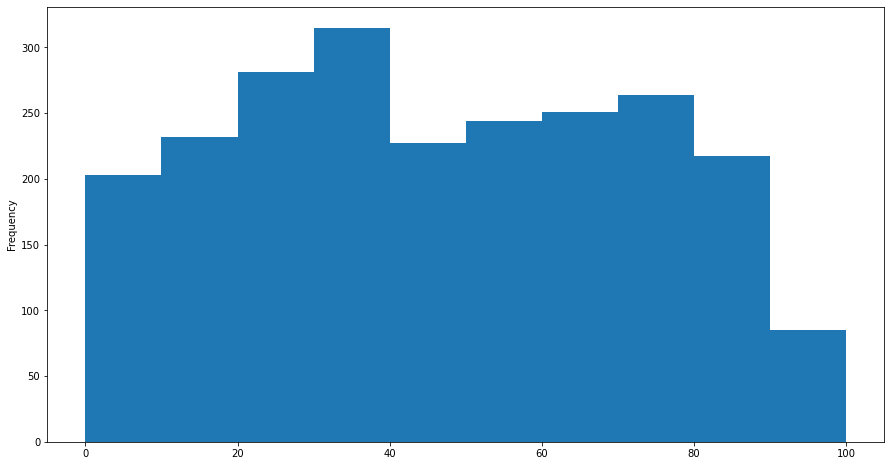

In [29]:
#now it would be great to compare percentages of ownership in each census tract, let's plot a histogram with deciles

own['Percent owner'].plot.hist(figsize=(15,8),bins=10)

This histogram tells us that only 100 of the 2345 census tracts in LA have about 100% who own their homes. Which tracts are these? I'd like to sort to find out

In [30]:
own_sorted = own.sort_values(by='Percent owner',ascending = False)

In [32]:
# display the data with a few columns
own_sorted[['geoid','Percent owner']].head(100)

,geoid,Percent owner
2251,14000US06037910811,100.000000
2338,14000US06037980026,100.000000
2333,14000US06037980021,100.000000
338,14000US06037141500,98.344066
1501,14000US06037503201,97.625571
...,...,...
1458,14000US06037500403,89.409560
351,14000US06037143901,89.375830
2312,14000US06037920338,89.316485
1840,14000US06037571000,89.266738


impressive there are 3 tracts with 100% ownership, would like more detail on the sample size, number of people in these tracts. Let's see if I can view rows that have 100% ownership

In [33]:
own[own['Percent owner']==100]

,geoid,name,total,"total, Error",owner,"owner, Error",renter,"renter, Error",geometry,Percent error for total,Percent owner,Percent renter
2251,14000US06037910811,"Census Tract 9108.11, Los Angeles, CA",41.0,26.0,41.0,26.0,0.0,12.0,"MULTIPOLYGON (((-118.40529 34.38096, -118.3972...",63.414634,100.0,0.0
2333,14000US06037980021,"Census Tract 9800.21, Los Angeles, CA",8.0,8.0,8.0,8.0,0.0,12.0,"MULTIPOLYGON (((-118.40183 34.26509, -118.4017...",100.000000,100.0,0.0
2338,14000US06037980026,"Census Tract 9800.26, Los Angeles, CA",4.0,7.0,4.0,7.0,0.0,12.0,"MULTIPOLYGON (((-118.35173 34.28034, -118.3517...",175.000000,100.0,0.0


Ok this is interesting and potentially problematic, as I see the margin of error for these tracts is quite high! Small population, but a lot of the sample was missed? I am not a census data nerd, and am noting this for future reference but in the meantime will proceed with mapping my data

<AxesSubplot:>

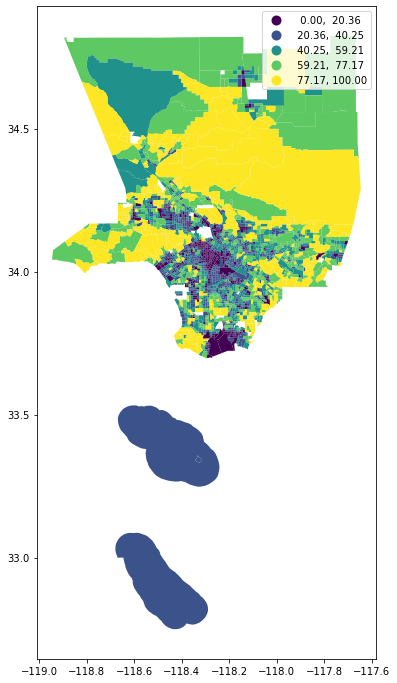

In [34]:
# natural breaks
own.plot(figsize=(12,12),
                 column='Percent owner',
                 legend=True, 
                 scheme='NaturalBreaks')

<AxesSubplot:>

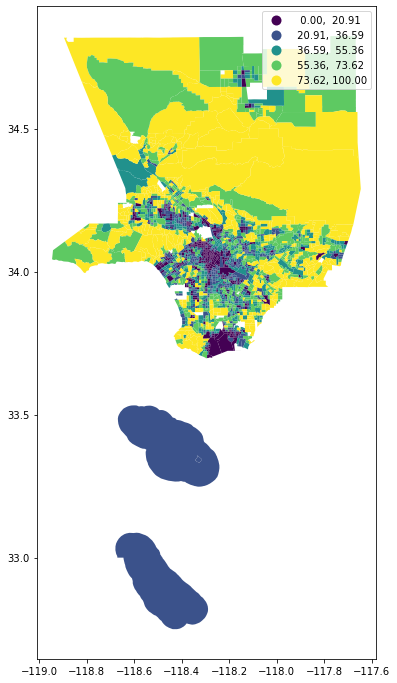

In [50]:
#I'm going to get more precise and map the 3 census tracts with a 100% just to see what's going on more...

own.plot(figsize=(12,12),
                 column='Percent owner',
                 legend=True, 
                 scheme='quantiles')

In [55]:
#Need to just plot the 100% ones as there is still too much going on so this is what I'm going to do!

own_all = own[own['Percent owner']==100.0]

<AxesSubplot:>

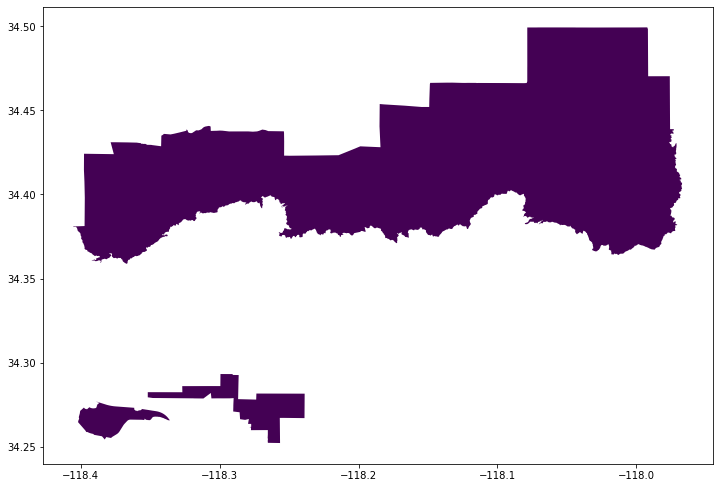

In [56]:
own_all.plot(figsize=(12,12),
                 column='Percent owner')

This doesn't make sense to me unless I overlay it on a map

In [57]:
# reproject to Web Mercator for compatibility with census map projection
own_web_mercator = own.to_crs(epsg=3857)

<AxesSubplot:>

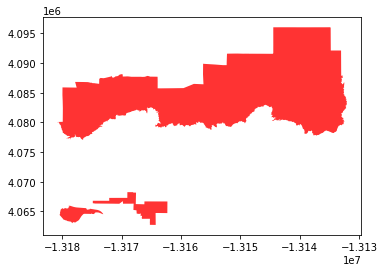

In [61]:
own_web_mercator[own_web_mercator['Percent owner'] > 99.9].plot(
                                                               color="red",
                                                               alpha=0.8)

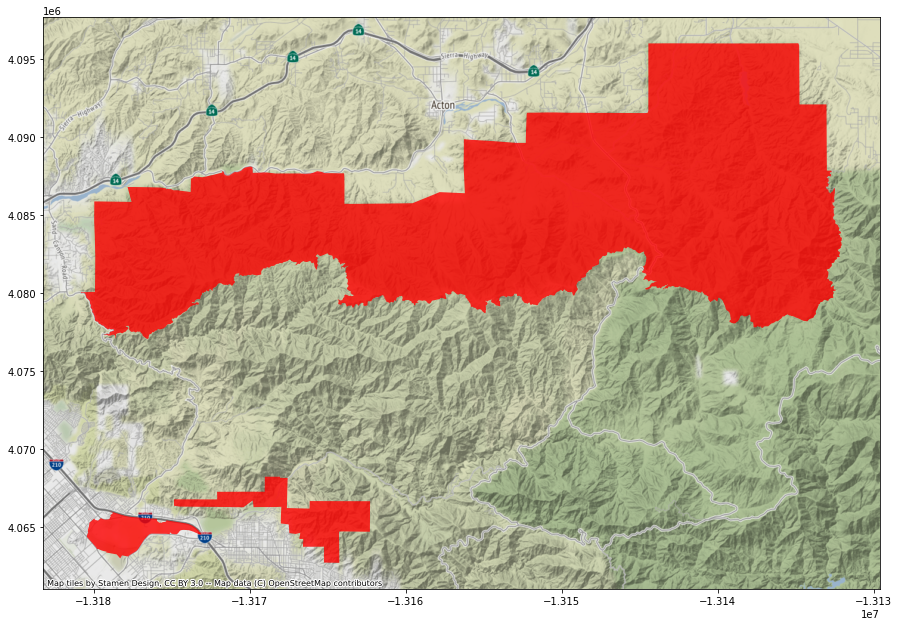

In [64]:
#time to add the basemap
fig, ax = plt.subplots(figsize=(15, 15))

own_web_mercator[own_web_mercator['Percent owner'] > 99.9].plot(
                                                               color="red",
    ax=ax,
                                                               alpha=0.8)

ctx.add_basemap(ax)

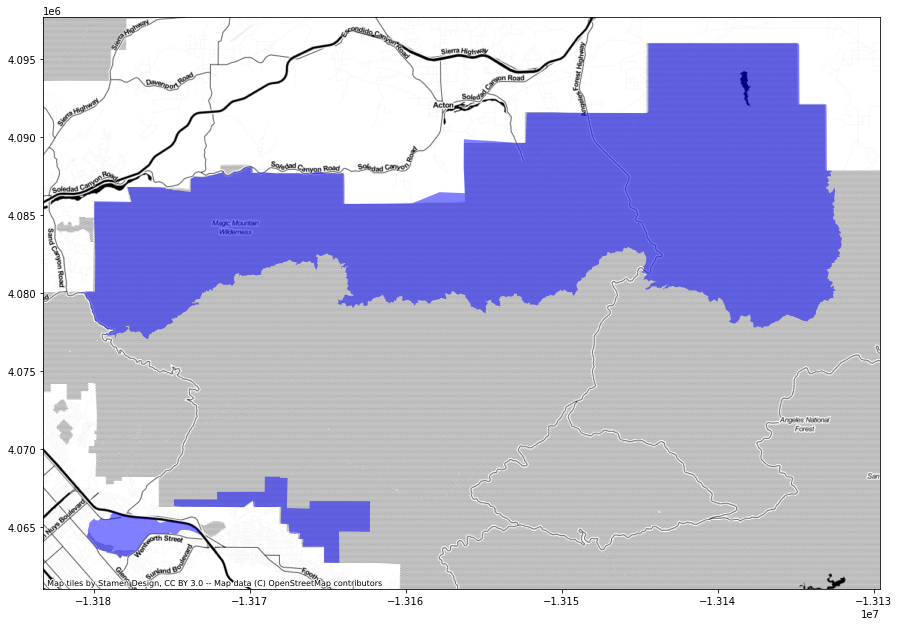

In [65]:
#not to my asthetic liking, let's try this!

#time to add the basemap
fig, ax = plt.subplots(figsize=(15, 15))

own_web_mercator[own_web_mercator['Percent owner'] > 99.9].plot(
                                                               color="blue",
    ax=ax,
                                                               alpha=0.5)

ctx.add_basemap(ax,source=ctx.providers.Stamen.Toner)

Somewhat better, but I need to figure out how to zoom out the code. What I'll do is plot 2 axes for now so I can compare.

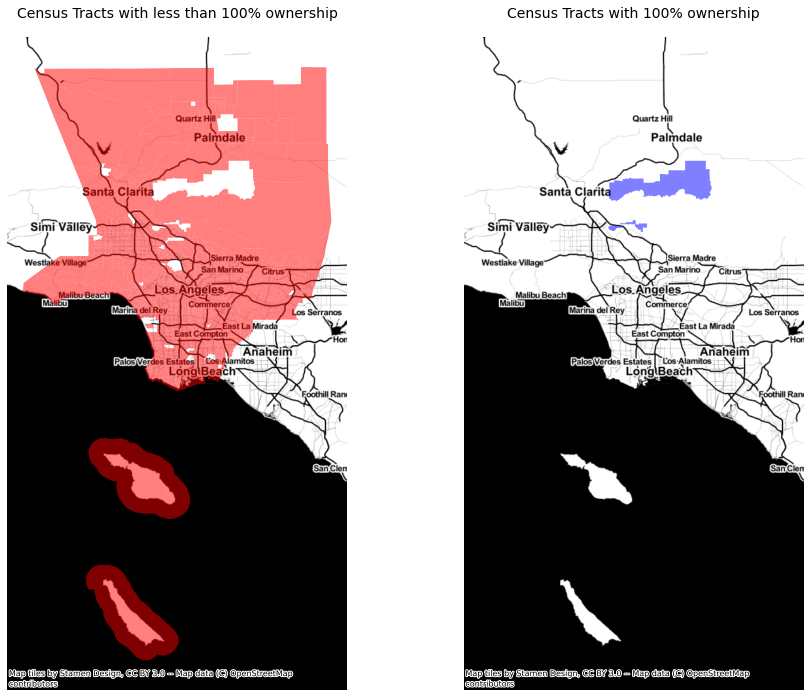

In [67]:
# create the 1x2 subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 12),sharex=True,sharey=True)

# name each subplot
ax1, ax2 = axs

# add the layer with ax=ax in the argument 
own_web_mercator[own_web_mercator['Percent owner'] < 99.9].plot(ax=ax1, 
                                                                           alpha=0.5, 
                                                                           color="red")

ax1.axis("off")
ax1.set_title('Census Tracts with less than 100% ownership',fontsize=14, pad=20)

# add a basemap
ctx.add_basemap(ax1, source=ctx.providers.Stamen.Toner) # default zoom

# add the layer with ax=ax in the argument 
own_web_mercator[own_web_mercator['Percent owner'] > 99.9].plot(ax=ax2, 
                                                                           alpha=0.5, 
                                                                           color="blue")


ax2.axis("off")
ax2.set_title('Census Tracts with 100% ownership',fontsize=14, pad=20)
# add a basemap
ctx.add_basemap(ax2, zoom=9, source=ctx.providers.Stamen.Toner) # zoom override

Well now I understand better what is up with these census tracts where there is 100% ownership. It may or may not be the case for these tracts due to the large margin of error and they cover parts of LA where few to no people live in the foothills and mountains! Well it took me almost 2 hours to get here, but good that I 1) I looked closely at the rows and saw the small population, and 2) assessed that due to the sample size for the population in these tracts, this percentage may not be reliable. Question for another time regarding what to do when census data has large sampling error!!!

Also seems that there are tracts that have no data, which I also saw above when doing my data exploration earlier.

Now what would happen if I mapped data for housing tenure for the American Indian Alaska Native race category? Let's find out shall we?

In [68]:
#import Table B25003C: Tenure (American Indian and Alaska Native Alone Householder for census tracts in LA county

aina_own = gpd.read_file('acs2019_5yr_B25003C_14000US06037222001.geojson')

In [69]:
aina_own.shape

(2346, 9)

In [71]:
aina_own.head()

,geoid,name,B25003C001,"B25003C001, Error",B25003C002,"B25003C002, Error",B25003C003,"B25003C003, Error",geometry
0,14000US06037101110,"Census Tract 1011.10, Los Angeles, CA",0.0,12.0,0.0,12.0,0.0,12.0,"MULTIPOLYGON (((-118.30229 34.25870, -118.3009..."
1,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",15.0,24.0,15.0,24.0,0.0,12.0,"MULTIPOLYGON (((-118.30334 34.27371, -118.3033..."
2,14000US06037101210,"Census Tract 1012.10, Los Angeles, CA",0.0,17.0,0.0,17.0,0.0,17.0,"MULTIPOLYGON (((-118.29945 34.25598, -118.2979..."
3,14000US06037101220,"Census Tract 1012.20, Los Angeles, CA",0.0,12.0,0.0,12.0,0.0,12.0,"MULTIPOLYGON (((-118.28593 34.25227, -118.2859..."
4,14000US06037101300,"Census Tract 1013, Los Angeles, CA",0.0,12.0,0.0,12.0,0.0,12.0,"MULTIPOLYGON (((-118.27822 34.25068, -118.2782..."


In [73]:
#let's change the column headers to something we understand

list(aina_own) # this is the same as df.columns.to_list()

['geoid',
 'name',
 'B25003C001',
 'B25003C001, Error',
 'B25003C002',
 'B25003C002, Error',
 'B25003C003',
 'B25003C003, Error',
 'geometry']

In [75]:
aina_own.columns = ['geoid',
 'name',
 'total',
 'total, Error',
 'owner',
 'owner, Error',
 'renter',
 'renter, Error',
 'geometry']

In [76]:
aina_own.head()

,geoid,name,total,"total, Error",owner,"owner, Error",renter,"renter, Error",geometry
0,14000US06037101110,"Census Tract 1011.10, Los Angeles, CA",0.0,12.0,0.0,12.0,0.0,12.0,"MULTIPOLYGON (((-118.30229 34.25870, -118.3009..."
1,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",15.0,24.0,15.0,24.0,0.0,12.0,"MULTIPOLYGON (((-118.30334 34.27371, -118.3033..."
2,14000US06037101210,"Census Tract 1012.10, Los Angeles, CA",0.0,17.0,0.0,17.0,0.0,17.0,"MULTIPOLYGON (((-118.29945 34.25598, -118.2979..."
3,14000US06037101220,"Census Tract 1012.20, Los Angeles, CA",0.0,12.0,0.0,12.0,0.0,12.0,"MULTIPOLYGON (((-118.28593 34.25227, -118.2859..."
4,14000US06037101300,"Census Tract 1013, Los Angeles, CA",0.0,12.0,0.0,12.0,0.0,12.0,"MULTIPOLYGON (((-118.27822 34.25068, -118.2782..."


<AxesSubplot:>

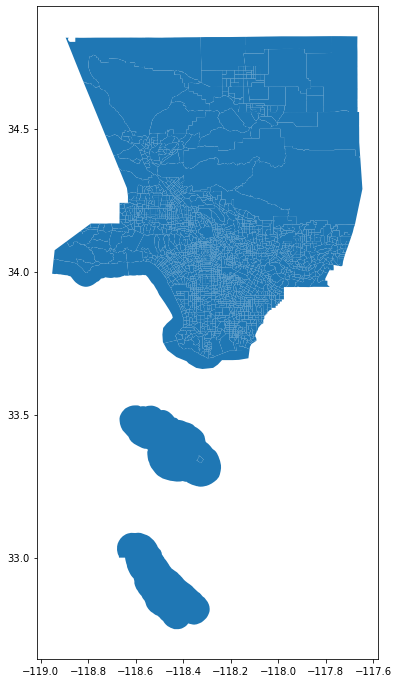

In [78]:
aina_own.plot(figsize=(12,12))

In [94]:
aina_own['Percent total, Error'] = aina_own['total, Error']/aina_own['total']*100
aina_own['Percent owner'] = aina_own['owner']/aina_own['total']*100
aina_own['Percent renter'] = aina_own['renter']/aina_own['total']*100

In [95]:
aina_own.head()

,geoid,name,total,"total, Error",owner,"owner, Error",renter,"renter, Error",geometry,Percent total,Percent owner,Percent renter,"Percent total, Error"
0,14000US06037101110,"Census Tract 1011.10, Los Angeles, CA",0.0,12.0,0.0,12.0,0.0,12.0,"MULTIPOLYGON (((-118.30229 34.25870, -118.3009...",0.761905,NaN,NaN,inf
1,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",15.0,24.0,15.0,24.0,0.0,12.0,"MULTIPOLYGON (((-118.30334 34.27371, -118.3033...",1.829268,100.0,0.0,160.0
2,14000US06037101210,"Census Tract 1012.10, Los Angeles, CA",0.0,17.0,0.0,17.0,0.0,17.0,"MULTIPOLYGON (((-118.29945 34.25598, -118.2979...",0.740096,NaN,NaN,inf
3,14000US06037101220,"Census Tract 1012.20, Los Angeles, CA",0.0,12.0,0.0,12.0,0.0,12.0,"MULTIPOLYGON (((-118.28593 34.25227, -118.2859...",0.884304,NaN,NaN,inf
4,14000US06037101300,"Census Tract 1013, Los Angeles, CA",0.0,12.0,0.0,12.0,0.0,12.0,"MULTIPOLYGON (((-118.27822 34.25068, -118.2782...",0.830450,NaN,NaN,inf


In [96]:
aina_own_sorted = aina_own.sort_values(by='Percent owner',ascending = False)

In [97]:
display(aina_own)

,geoid,name,total,"total, Error",owner,"owner, Error",renter,"renter, Error",geometry,Percent total,Percent owner,Percent renter,"Percent total, Error"
0,14000US06037101110,"Census Tract 1011.10, Los Angeles, CA",0.0,12.0,0.0,12.0,0.0,12.0,"MULTIPOLYGON (((-118.30229 34.25870, -118.3009...",0.761905,NaN,NaN,inf
1,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",15.0,24.0,15.0,24.0,0.0,12.0,"MULTIPOLYGON (((-118.30334 34.27371, -118.3033...",1.829268,100.0,0.0,160.00
2,14000US06037101210,"Census Tract 1012.10, Los Angeles, CA",0.0,17.0,0.0,17.0,0.0,17.0,"MULTIPOLYGON (((-118.29945 34.25598, -118.2979...",0.740096,NaN,NaN,inf
3,14000US06037101220,"Census Tract 1012.20, Los Angeles, CA",0.0,12.0,0.0,12.0,0.0,12.0,"MULTIPOLYGON (((-118.28593 34.25227, -118.2859...",0.884304,NaN,NaN,inf
4,14000US06037101300,"Census Tract 1013, Los Angeles, CA",0.0,12.0,0.0,12.0,0.0,12.0,"MULTIPOLYGON (((-118.27822 34.25068, -118.2782...",0.830450,NaN,NaN,inf
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2341,14000US06037980031,"Census Tract 9800.31, Los Angeles, CA",0.0,12.0,0.0,12.0,0.0,12.0,"MULTIPOLYGON (((-118.29105 33.75378, -118.2905...",50.000000,NaN,NaN,inf
2342,14000US06037980033,"Census Tract 9800.33, Los Angeles, CA",16.0,23.0,0.0,12.0,16.0,23.0,"MULTIPOLYGON (((-118.24897 33.75590, -118.2470...",143.750000,0.0,100.0,143.75
2343,14000US06037990100,"Census Tract 9901, Los Angeles, CA",0.0,12.0,0.0,12.0,0.0,12.0,"MULTIPOLYGON (((-118.95114 33.99643, -118.9505...",inf,NaN,NaN,inf
2344,14000US06037990200,"Census Tract 9902, Los Angeles, CA",0.0,12.0,0.0,12.0,0.0,12.0,"MULTIPOLYGON (((-118.63598 34.03255, -118.6325...",inf,NaN,NaN,inf


In [98]:
aina_own_sorted = aina_own.sort_values(by='Percent owner',ascending = True)
display(aina_own)

,geoid,name,total,"total, Error",owner,"owner, Error",renter,"renter, Error",geometry,Percent total,Percent owner,Percent renter,"Percent total, Error"
0,14000US06037101110,"Census Tract 1011.10, Los Angeles, CA",0.0,12.0,0.0,12.0,0.0,12.0,"MULTIPOLYGON (((-118.30229 34.25870, -118.3009...",0.761905,NaN,NaN,inf
1,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",15.0,24.0,15.0,24.0,0.0,12.0,"MULTIPOLYGON (((-118.30334 34.27371, -118.3033...",1.829268,100.0,0.0,160.00
2,14000US06037101210,"Census Tract 1012.10, Los Angeles, CA",0.0,17.0,0.0,17.0,0.0,17.0,"MULTIPOLYGON (((-118.29945 34.25598, -118.2979...",0.740096,NaN,NaN,inf
3,14000US06037101220,"Census Tract 1012.20, Los Angeles, CA",0.0,12.0,0.0,12.0,0.0,12.0,"MULTIPOLYGON (((-118.28593 34.25227, -118.2859...",0.884304,NaN,NaN,inf
4,14000US06037101300,"Census Tract 1013, Los Angeles, CA",0.0,12.0,0.0,12.0,0.0,12.0,"MULTIPOLYGON (((-118.27822 34.25068, -118.2782...",0.830450,NaN,NaN,inf
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2341,14000US06037980031,"Census Tract 9800.31, Los Angeles, CA",0.0,12.0,0.0,12.0,0.0,12.0,"MULTIPOLYGON (((-118.29105 33.75378, -118.2905...",50.000000,NaN,NaN,inf
2342,14000US06037980033,"Census Tract 9800.33, Los Angeles, CA",16.0,23.0,0.0,12.0,16.0,23.0,"MULTIPOLYGON (((-118.24897 33.75590, -118.2470...",143.750000,0.0,100.0,143.75
2343,14000US06037990100,"Census Tract 9901, Los Angeles, CA",0.0,12.0,0.0,12.0,0.0,12.0,"MULTIPOLYGON (((-118.95114 33.99643, -118.9505...",inf,NaN,NaN,inf
2344,14000US06037990200,"Census Tract 9902, Los Angeles, CA",0.0,12.0,0.0,12.0,0.0,12.0,"MULTIPOLYGON (((-118.63598 34.03255, -118.6325...",inf,NaN,NaN,inf


The population count for American Indian Alaska Native is already low, not to mention 0 in many tracts!

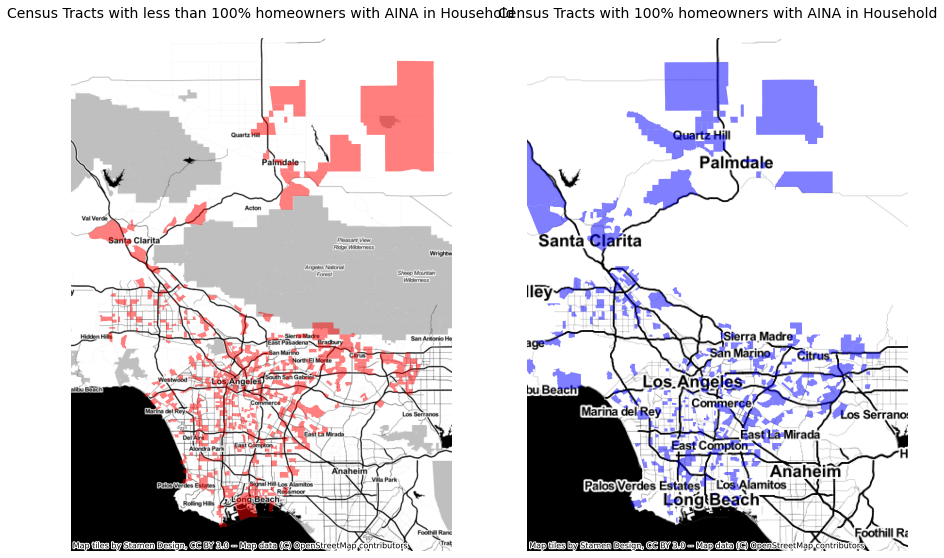

In [103]:
ax=ax
aina_own_web_mercator = aina_own.to_crs(epsg=3857)

fig, axs = plt.subplots(1, 2, figsize=(15, 12),sharex=True,sharey=True)

ax1, ax2 = axs

aina_own_web_mercator[aina_own_web_mercator['Percent owner'] < 99.9].plot(ax=ax1, 
                                                                           alpha=0.5, 
                                                                           color="red")

ax1.axis("off")
ax1.set_title('Census Tracts with less than 100% homeowners with AINA in Household',fontsize=14, pad=20)

# add a basemap
ctx.add_basemap(ax1, source=ctx.providers.Stamen.Toner) # default zoom

# add the layer with ax=ax in the argument 
aina_own_web_mercator[aina_own_web_mercator['Percent owner'] > 99.9].plot(ax=ax2, 
                                                                           alpha=0.5, 
                                                                           color="blue")


ax2.axis("off")
ax2.set_title('Census Tracts with 100% homeowners with AINA in Household',fontsize=14, pad=20)
# add a basemap
ctx.add_basemap(ax2, zoom=9, source=ctx.providers.Stamen.Toner) # zoom override


Text(0.5, 1.0, 'Census Tracts with 100% homeowners with AINA in Household')

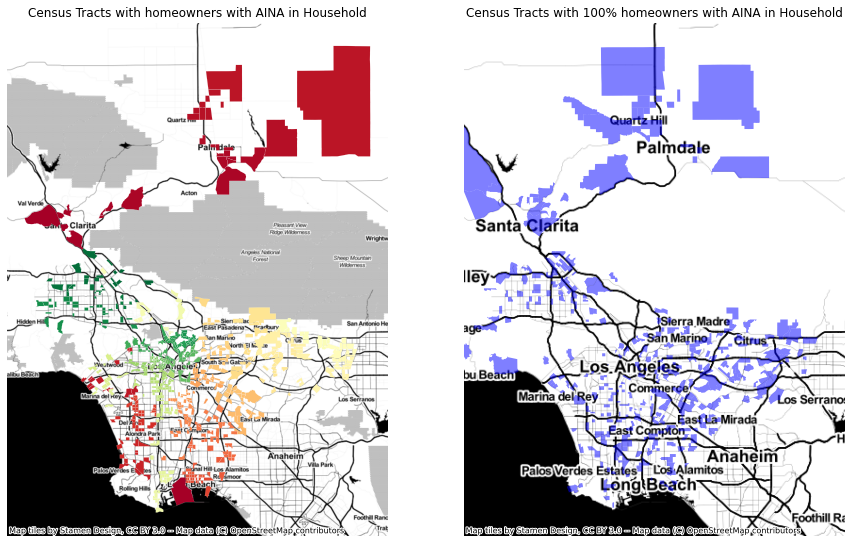

In [107]:
fig, axs = plt.subplots(1, 2, figsize=(15, 12), sharex=True, sharey=True)

# name each subplot
ax1, ax2 = axs

aina_own_web_mercator[aina_own_web_mercator['Percent owner'] < 99.9].plot(
            cmap='RdYlGn_r', 
            scheme='user_defined',
            classification_kwds={'bins':[20,40,60,80,100]},
            edgecolor='white', 
            linewidth=0.1, 
            ax=ax1, 
            legend=True
           )
ctx.add_basemap(ax1, source=ctx.providers.Stamen.Toner)
ax1.axis("off")
ax1.set_title("Census Tracts with homeowners with AINA in Household")

# percent black map on the right
aina_own_web_mercator[aina_own_web_mercator['Percent owner'] > 99.9].plot(ax=ax2, 
                                                                           alpha=0.5, 
                                                                           color="blue")
ctx.add_basemap(ax2, zoom=9, source=ctx.providers.Stamen.Toner)
ax2.axis("off")
ax2.set_title("Census Tracts with 100% homeowners with AINA in Household")

/opt/conda/lib/python3.9/site-packages/contextily/tile.py:581: UserWarning: The inferred zoom level of 27 is not valid for the current tile provider (valid zooms: 0 - 20).
  warnings.warn(msg)


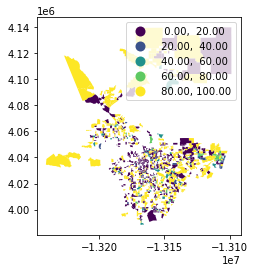

In [126]:
aina_own_web_mercator = aina_own.to_crs(epsg=3857)
ax=ax

aina_own_web_mercator.plot(column='Percent owner',                
                 legend=True, 
                 scheme='equal_interval')
                                     
ctx.add_basemap(ax,source=ctx.providers.Stamen.TonerLite)

will have to troubleshoot this one, not sure why the base map isn't loading...